In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('/kaggle/input/80-cereals/cereal.csv')

In [15]:
df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [18]:
# Descriptive Statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


In [29]:
# Top Rated Cereals
top_rated = df.nlargest(5,'rating')
print("Top Rated Cereals:\n", top_rated[['name', 'rating']])

Top Rated Cereals:
                          name     rating
3   All-Bran with Extra Fiber  93.704912
64     Shredded Wheat 'n'Bran  74.472949
65  Shredded Wheat spoon size  72.801787
0                   100% Bran  68.402973
63             Shredded Wheat  68.235885


In [32]:
# Nutritional Content by Manufacturer
nutritional_by_mfr = df.groupby('mfr').mean(numeric_only=True)
print("Nutritional Content by Manufacturer:\n")
pd.DataFrame(nutritional_by_mfr)

Nutritional Content by Manufacturer:



,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
mfr,,,,,,,,,,,,,
A,100.000000,4.000000,1.000000,0.000000,0.000000,16.000000,3.000000,95.000000,25.000000,2.000000,1.000000,1.000000,54.850917
G,111.363636,2.318182,1.363636,200.454545,1.272727,14.727273,7.954545,85.227273,35.227273,2.136364,1.049091,0.875000,34.485852
K,108.695652,2.652174,0.608696,174.782609,2.739130,15.130435,7.565217,103.043478,34.782609,2.347826,1.077826,0.796087,44.038462
N,86.666667,2.833333,0.166667,37.500000,4.000000,16.000000,1.833333,120.666667,8.333333,1.666667,0.971667,0.778333,67.968567
P,108.888889,2.444444,0.888889,146.111111,2.777778,13.222222,8.777778,113.888889,25.000000,2.444444,1.064444,0.714444,41.705744
Q,95.000000,2.625000,1.750000,92.500000,1.337500,10.000000,5.250000,74.375000,12.500000,2.375000,0.875000,0.823750,42.915990
R,115.000000,2.500000,1.250000,198.125000,1.875000,17.625000,6.125000,89.250000,25.000000,2.000000,1.000000,0.871250,41.542997


In [27]:
# Correlation Analysis
df.corr(numeric_only=True)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


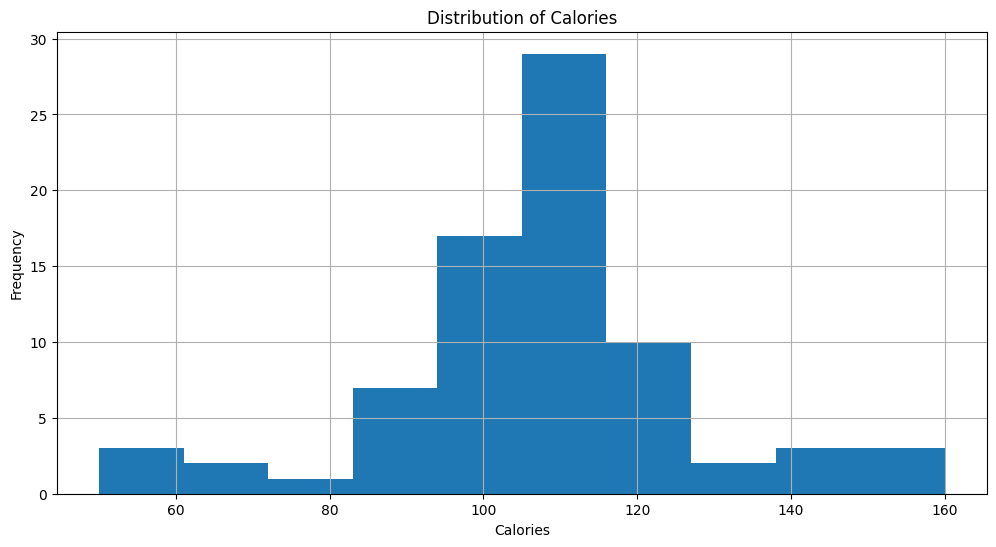

In [28]:
plt.figure(figsize=(12,6))
df['calories'].hist(bins=10)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

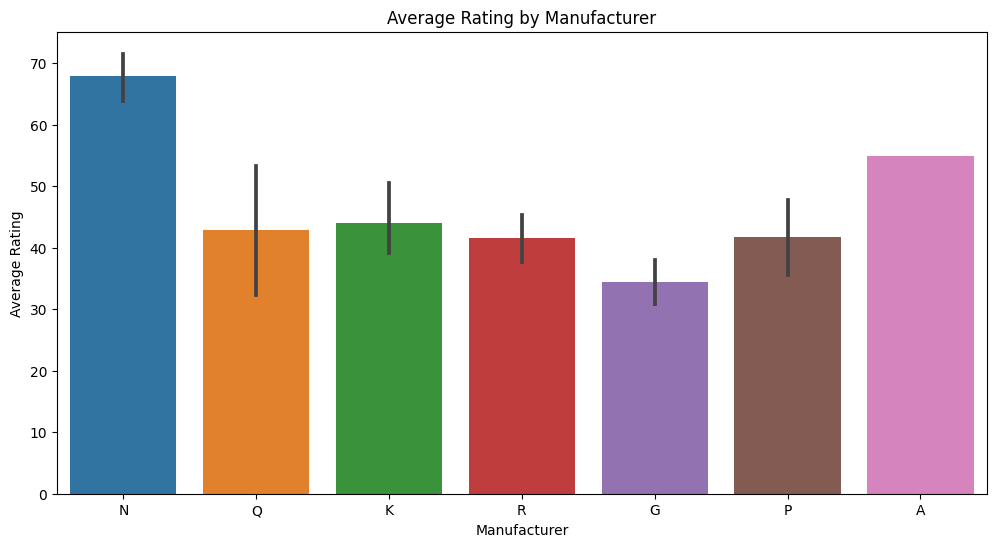

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='mfr',y='rating',data=df)
plt.title('Average Rating by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Rating')
plt.show()

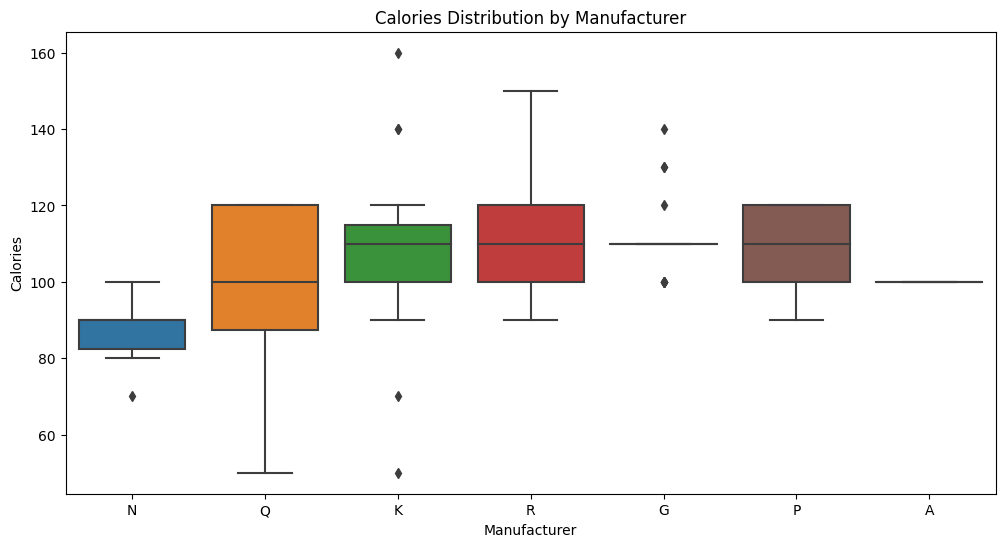

In [36]:
plt.figure(figsize=(12,6))
sns.boxplot(x='mfr',y='calories',data=df)
plt.title('Calories Distribution by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Calories')
plt.show()

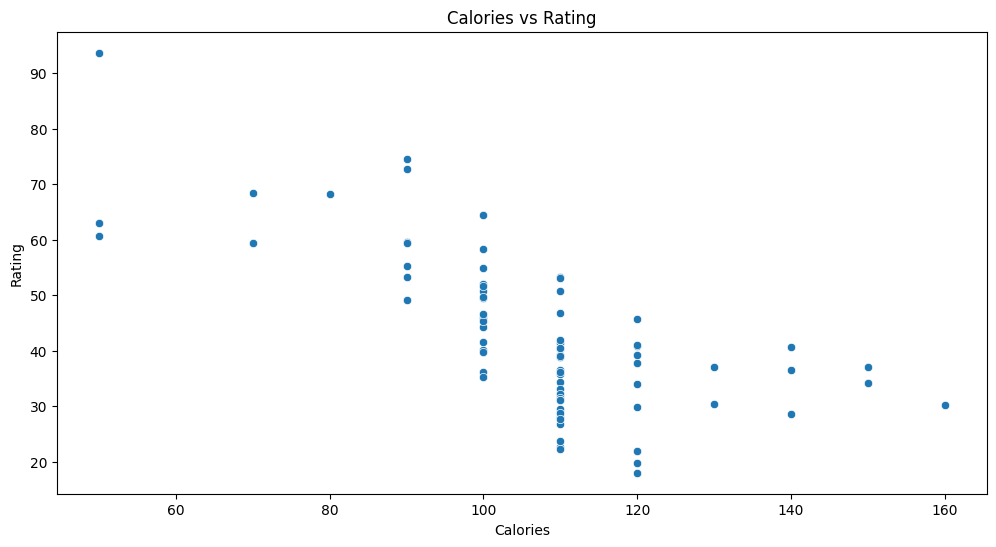

In [37]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='calories',y='rating',data=df)
plt.title('Calories vs Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.show()

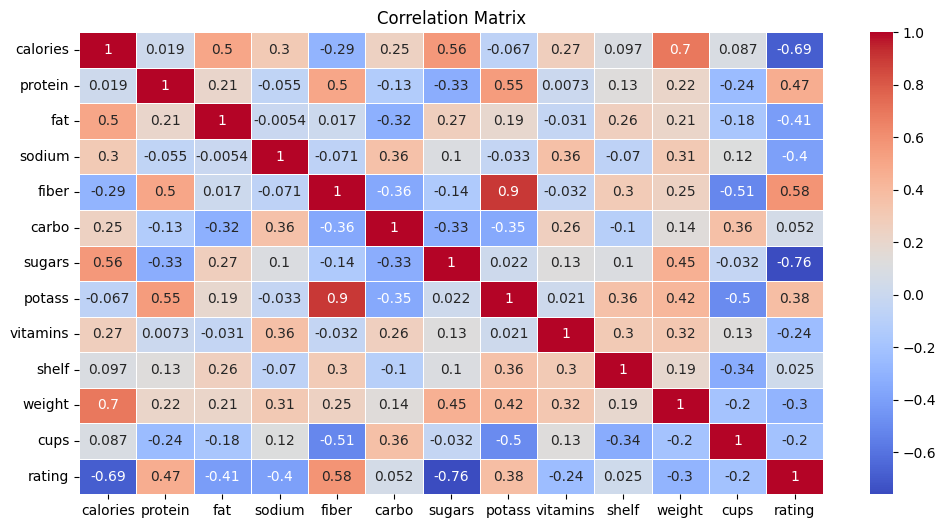

In [38]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

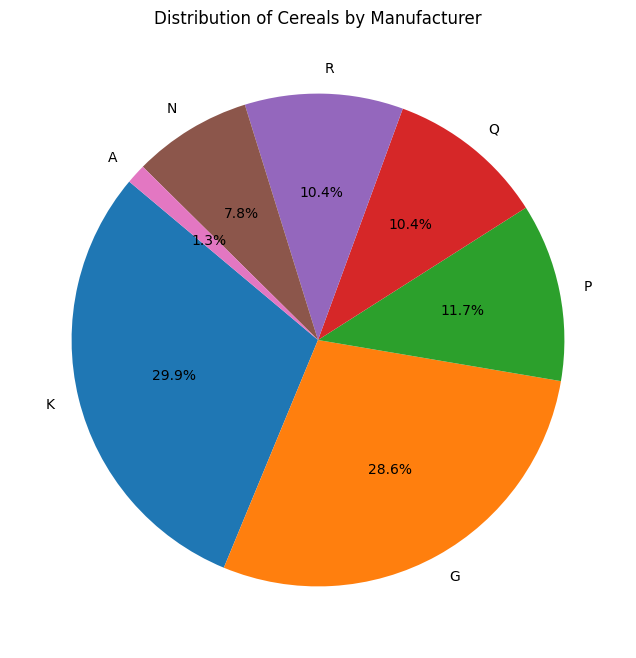

In [39]:
mfr_counts=df['mfr'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(mfr_counts,labels=mfr_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Cereals by Manufacturer')
plt.show()